# Predictive Analytics - Homework on Clustering

We first import everything we need (this is good practice).

In [61]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
set_link_color_palette(['black'])
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

We start with 8 points in two dimensional space.

In [62]:
itemlabels = ['D_1','D_2','D_3','D_4','D_5','D_6','D_7','D_8']
df = pd.read_csv('data/ex_cluster.csv', header=None, prefix='X')
df['point']=itemlabels
df.set_index('point', inplace=True)
df

,X0,X1
point,,
D_1,2,10
D_2,2,5
D_3,8,4
D_4,5,8
D_5,7,5
D_6,6,4
D_7,1,2
D_8,4,9


We store the values we need in an array again, so we can use it in our algorithms directly.

In [63]:
X = df.values
X

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

And as a final preparation step, we will prepare an array of initial centroids for **explicit seeding** of the k-means algorithm

In [64]:
initcenters = np.ndarray(shape=(3,2),dtype=int,buffer=np.array([2,10,5,8,1,2]))
initcenters

array([[ 2, 10],
       [ 5,  8],
       [ 1,  2]])

### 1. Produce a scatter plot of the array X together with the initial centroids

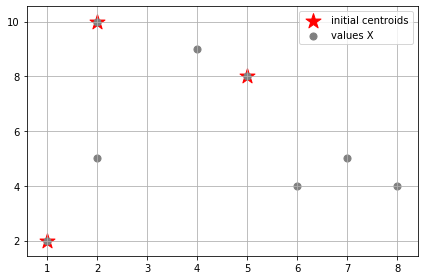

In [65]:
plt.scatter(initcenters[:,0], initcenters[:,1], c='red', marker='*', s=250, label='initial centroids')
plt.scatter(X[:,0], X[:,1], c='grey', marker='o', s=50, label='values X')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./figures/init_centroids.png', dpi=300)
plt.show()

### 2. Try to find the optimal number of clusters using the elbow method using random seeding

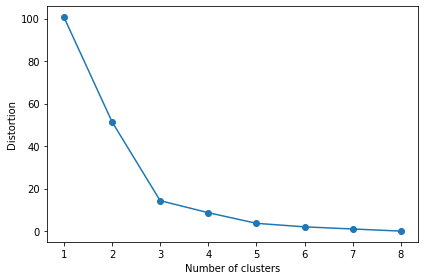

3 seems to be the optimal


In [66]:
distortions = []
for i in range(1, len(X)+1):
    km = KMeans(n_clusters=i, 
                init='k-means++', # this can be left out, as it is the default
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,len(X)+1), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('./figures/elbow.png', dpi=300)
plt.show()
print("3 seems to be the optimal")

### 3. Apply k-means with k=3 and explicit seeding starting with just 1 iteration up to the point where nothing changes anymore. Document what you are doing by saving the corresponding plots to files and incorporating those into the notebook.

In [67]:
for i in range(1,11):
    plt.clf()
    km = KMeans(n_clusters=3, 
            init='random', # leave this out for k-means++ (see below)
            n_init=i, 
            max_iter=1,
            tol=1e-04,
            random_state=0)
    y_km = km.fit_predict(X)

    plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='green', 
            marker='s', 
            label='cluster 1')
    plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
    plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='blue', 
            marker='v', 
            label='cluster 3')
    plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig('./figures/centroids'+str(i)+'.png', dpi=300)
plt.close()

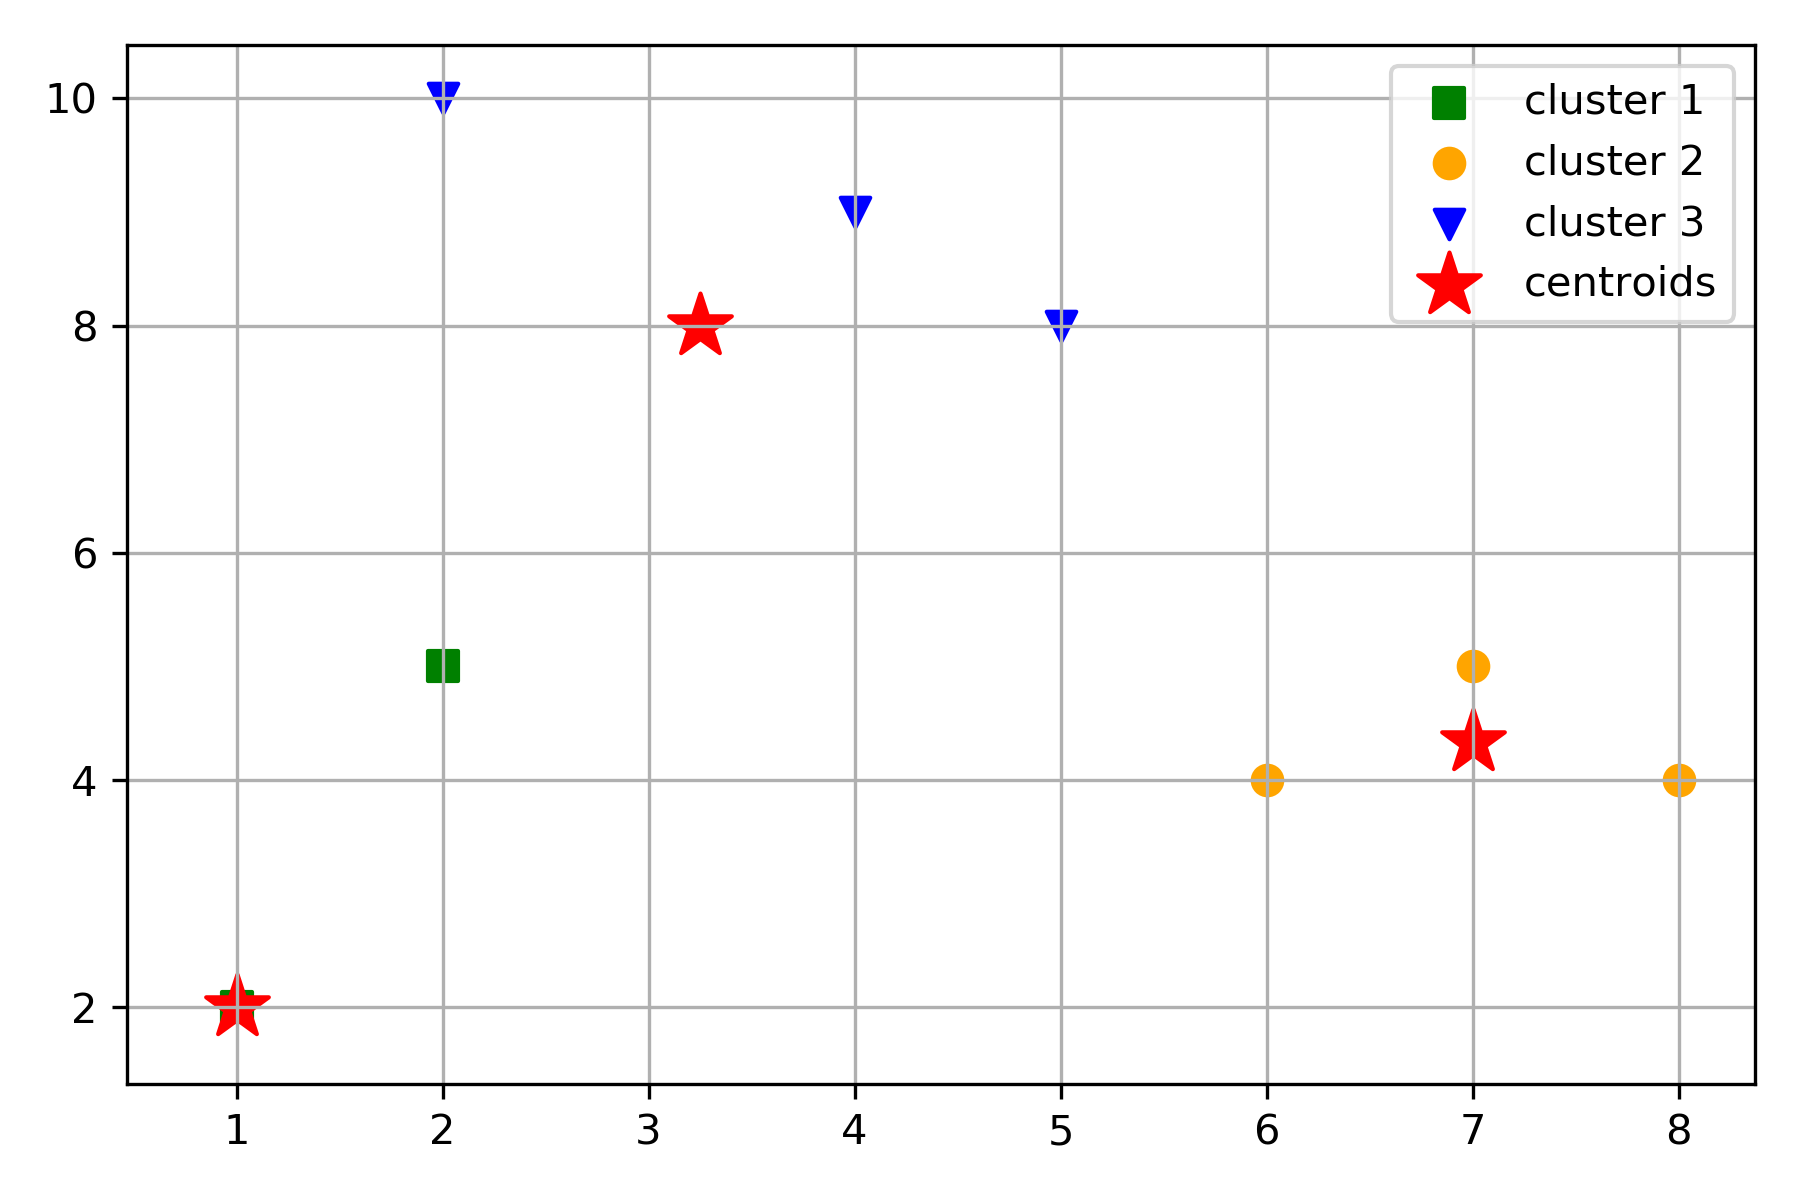

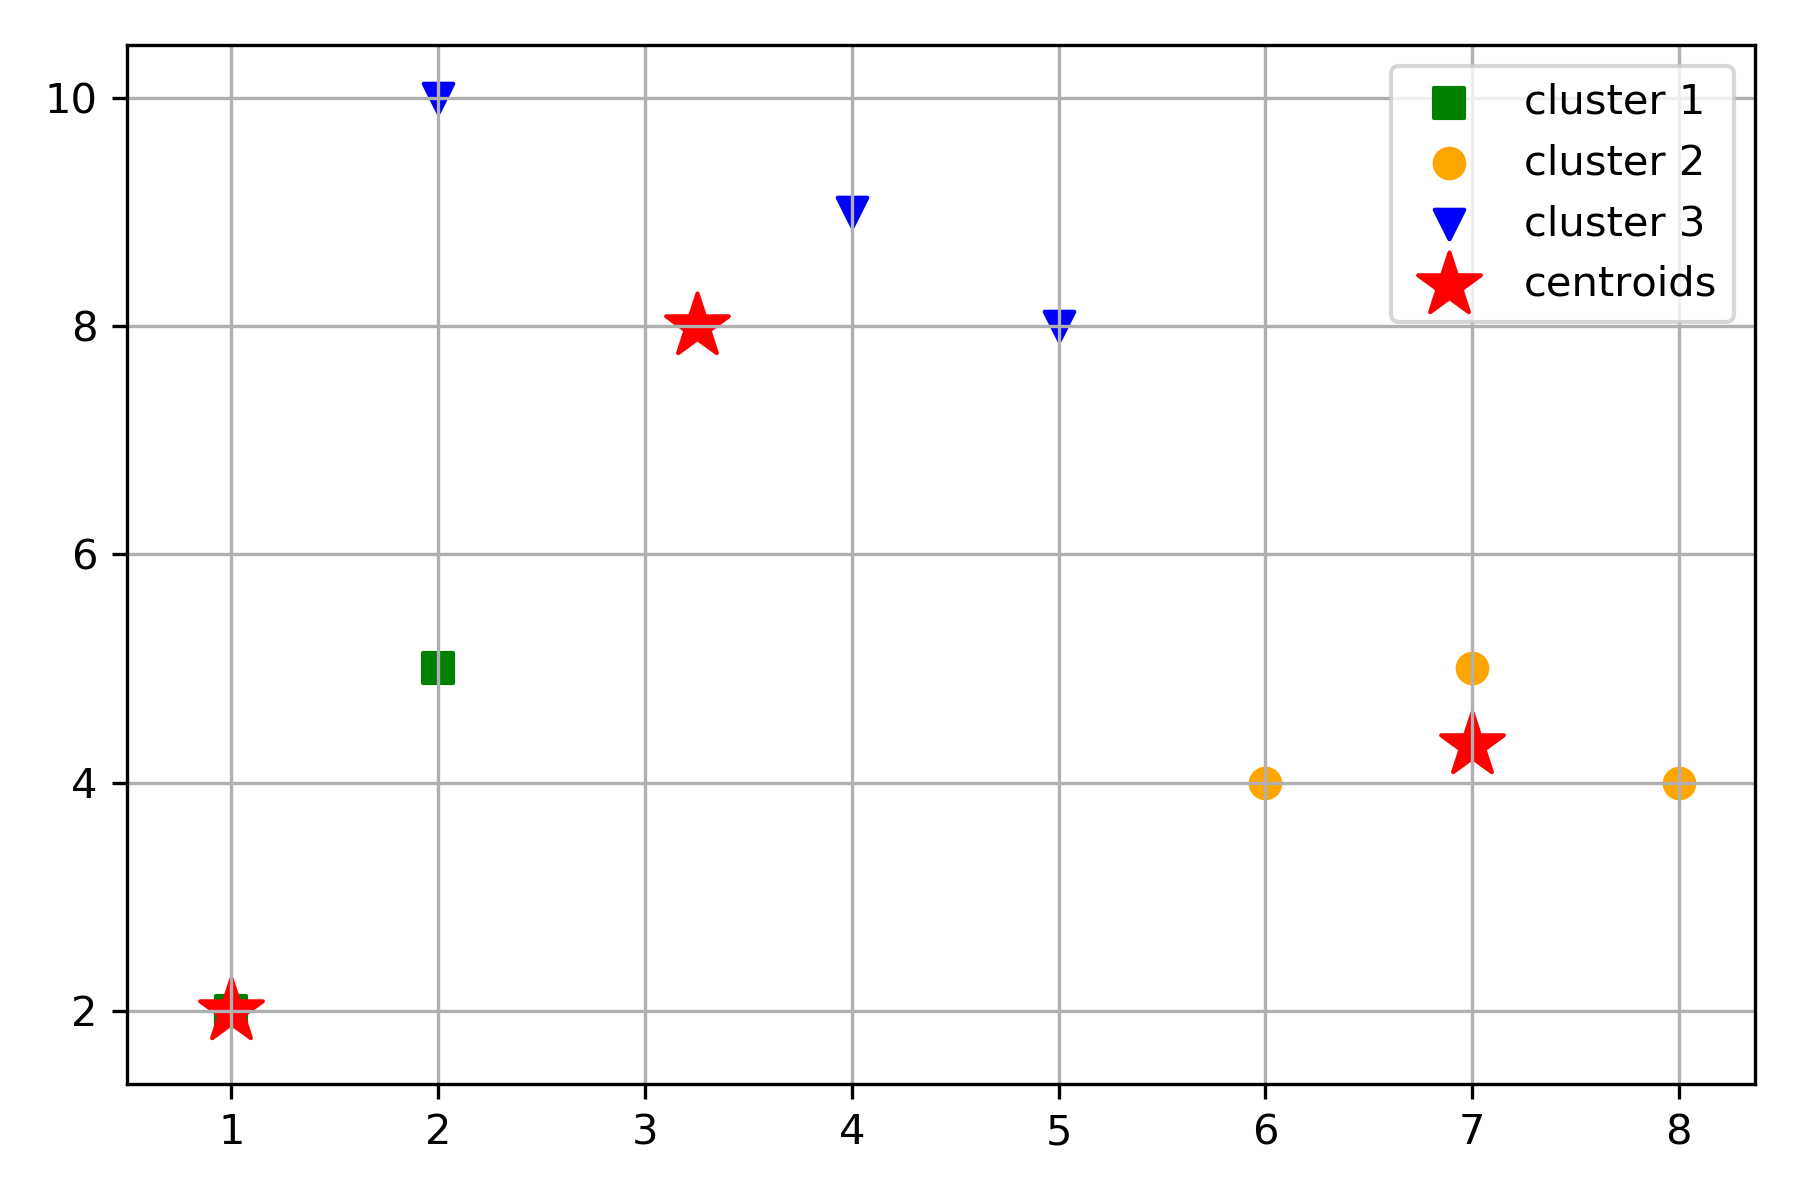

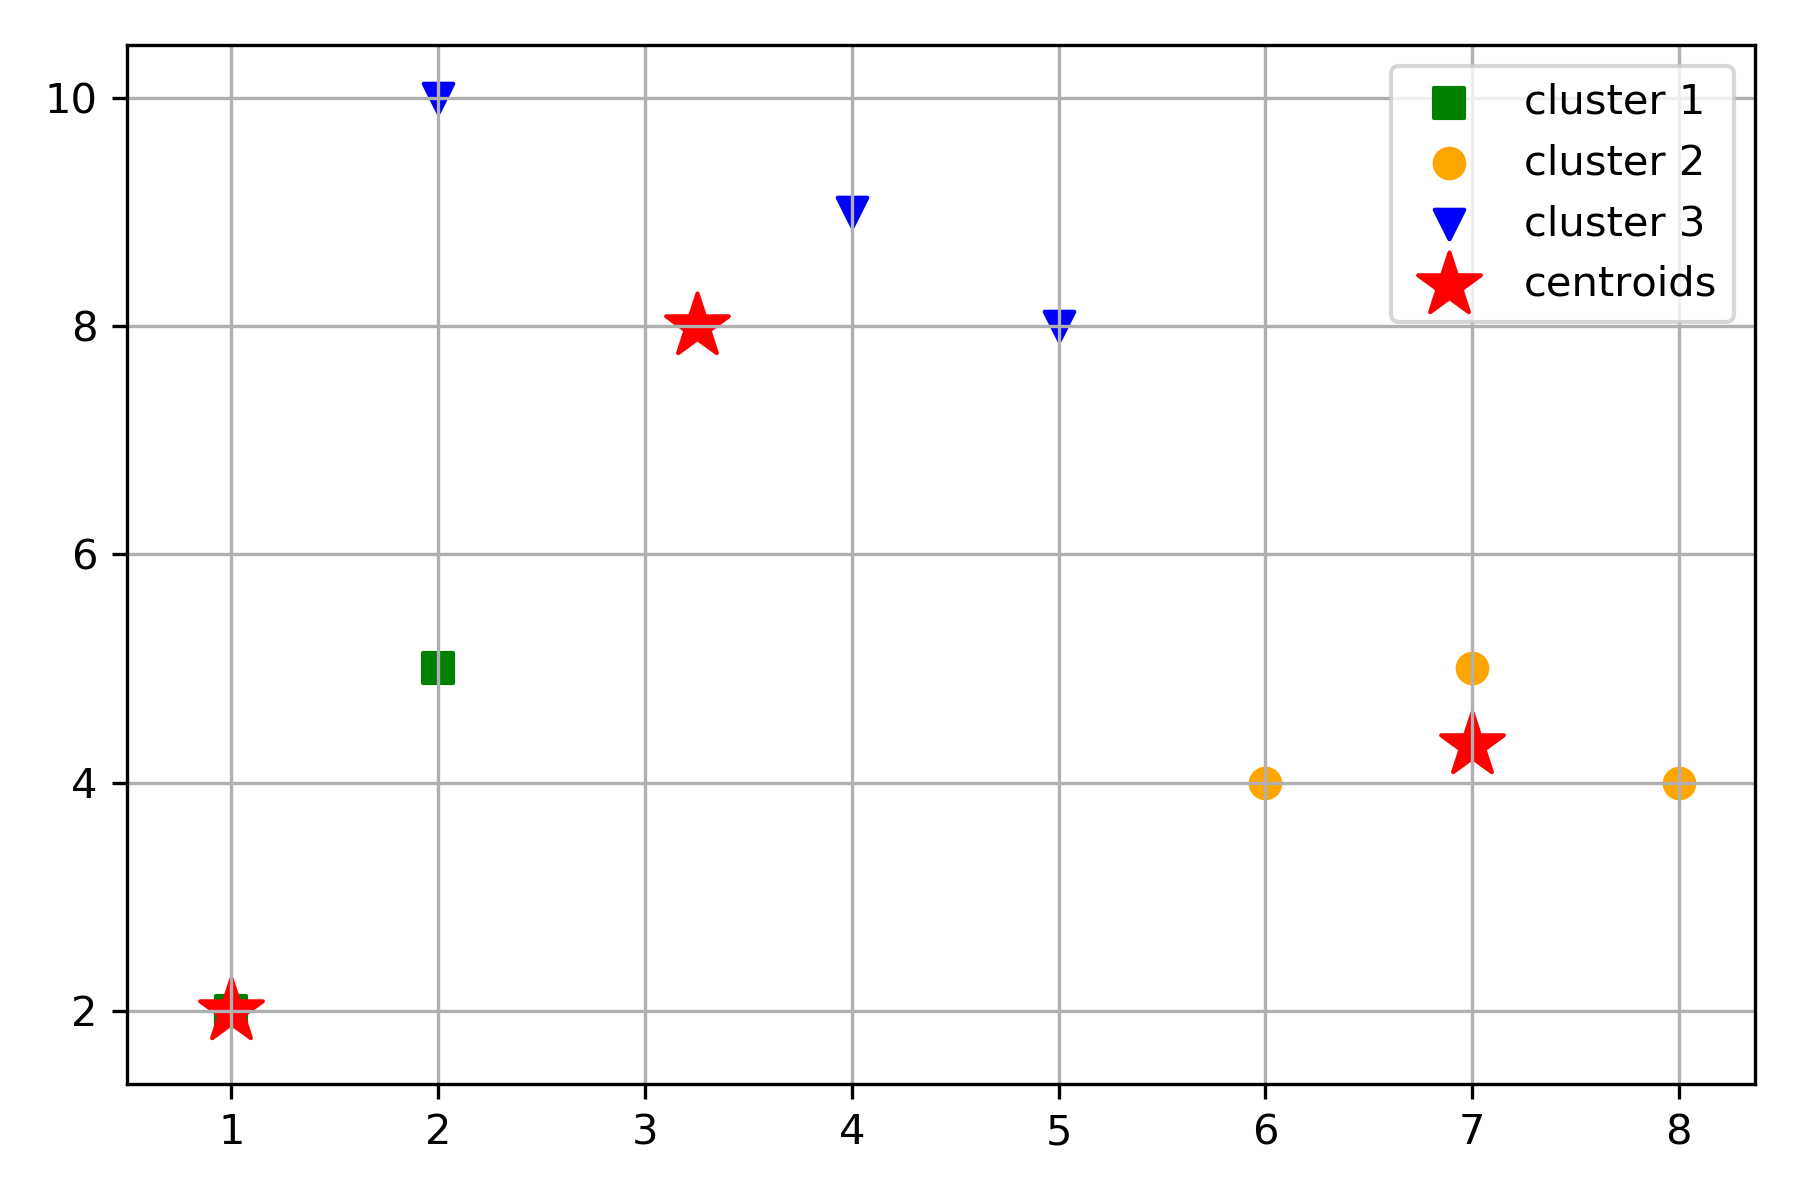

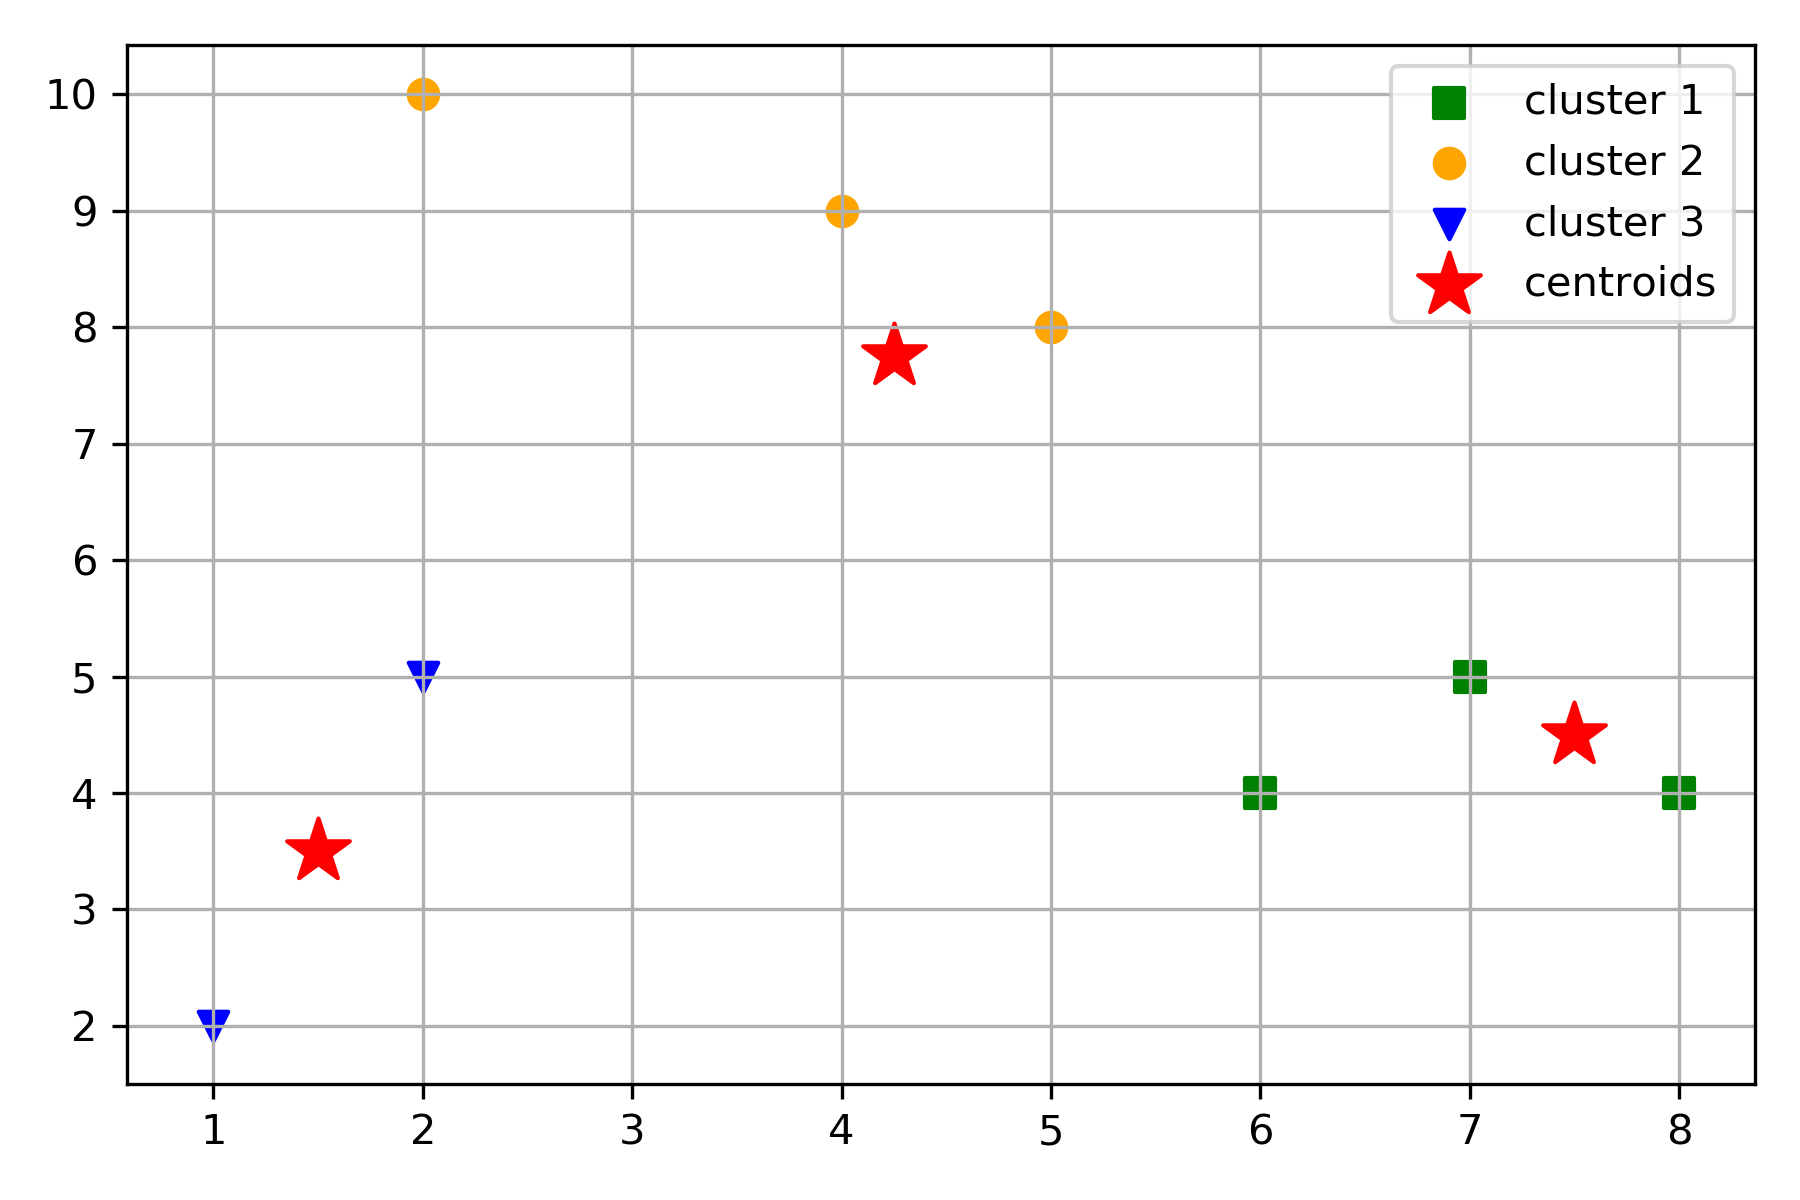

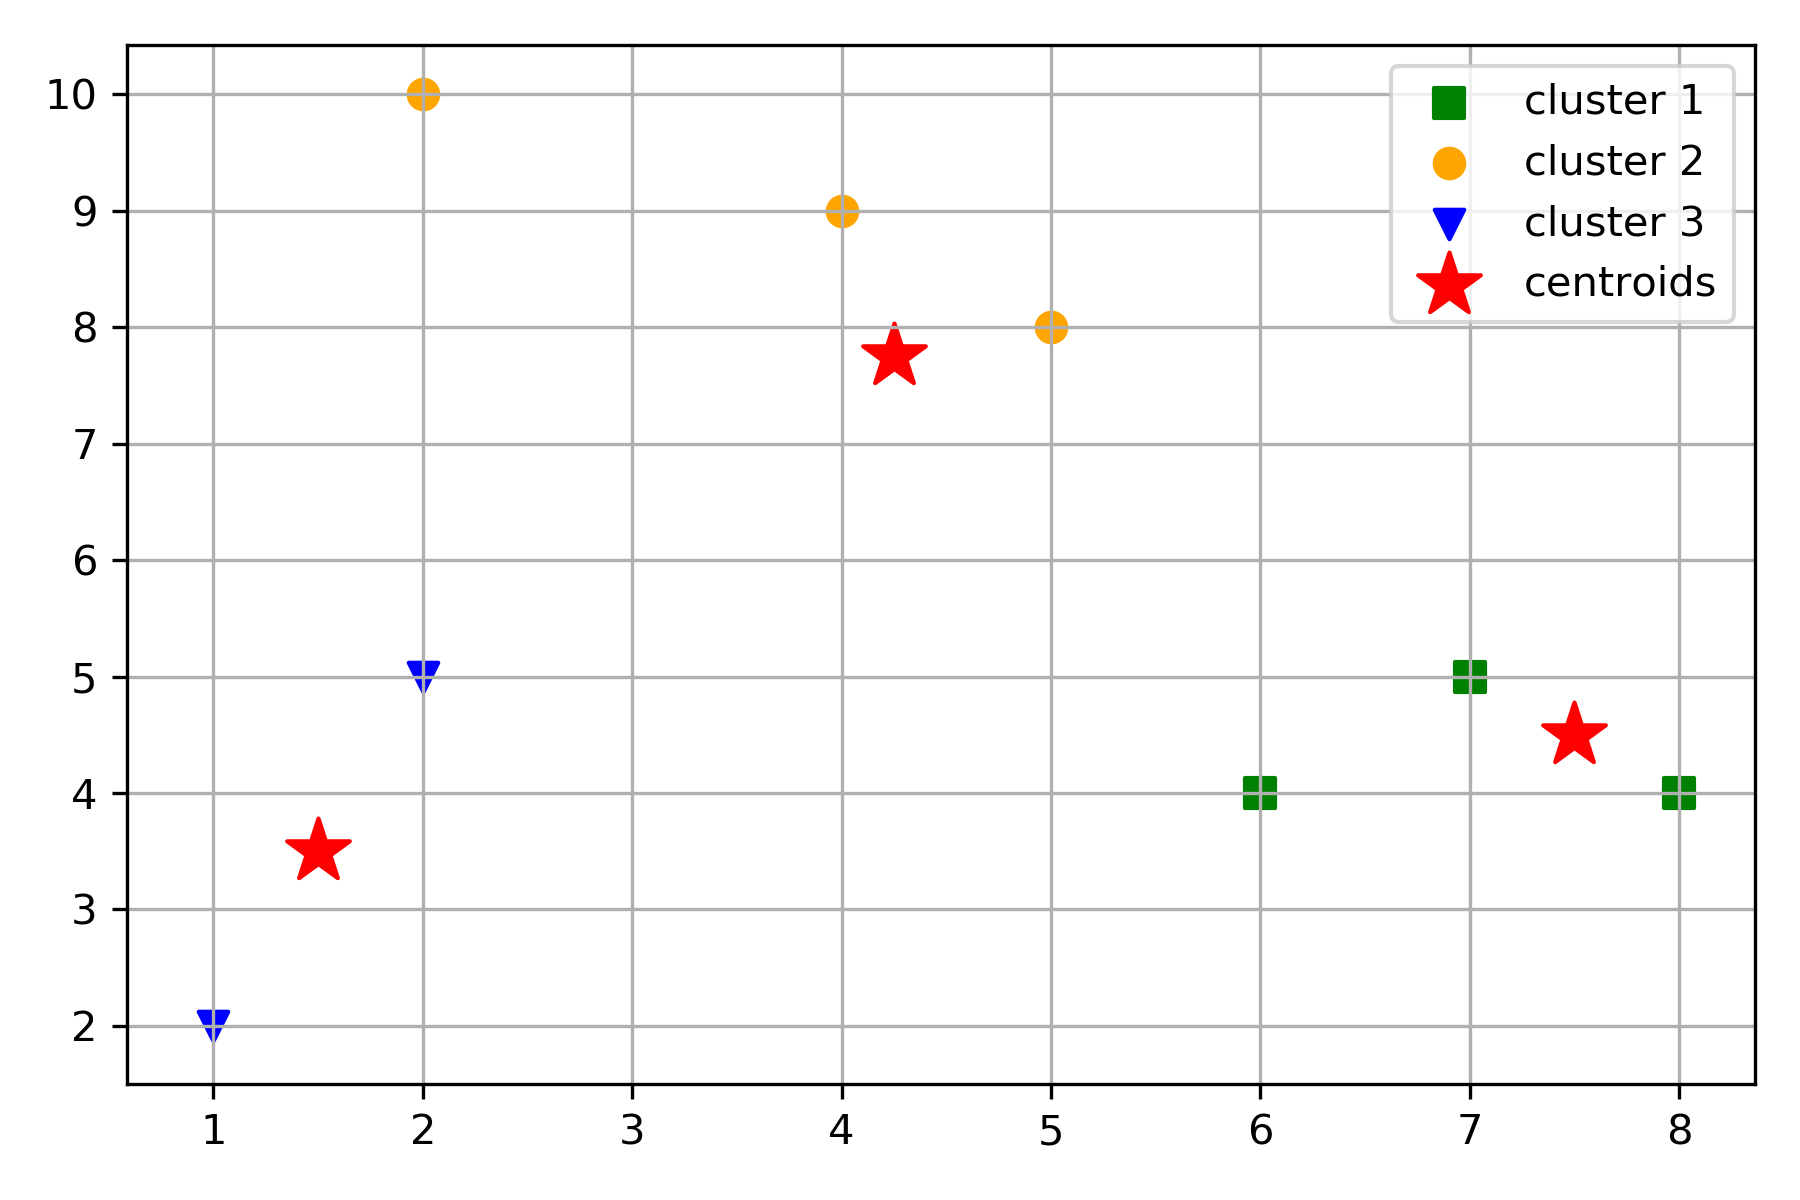

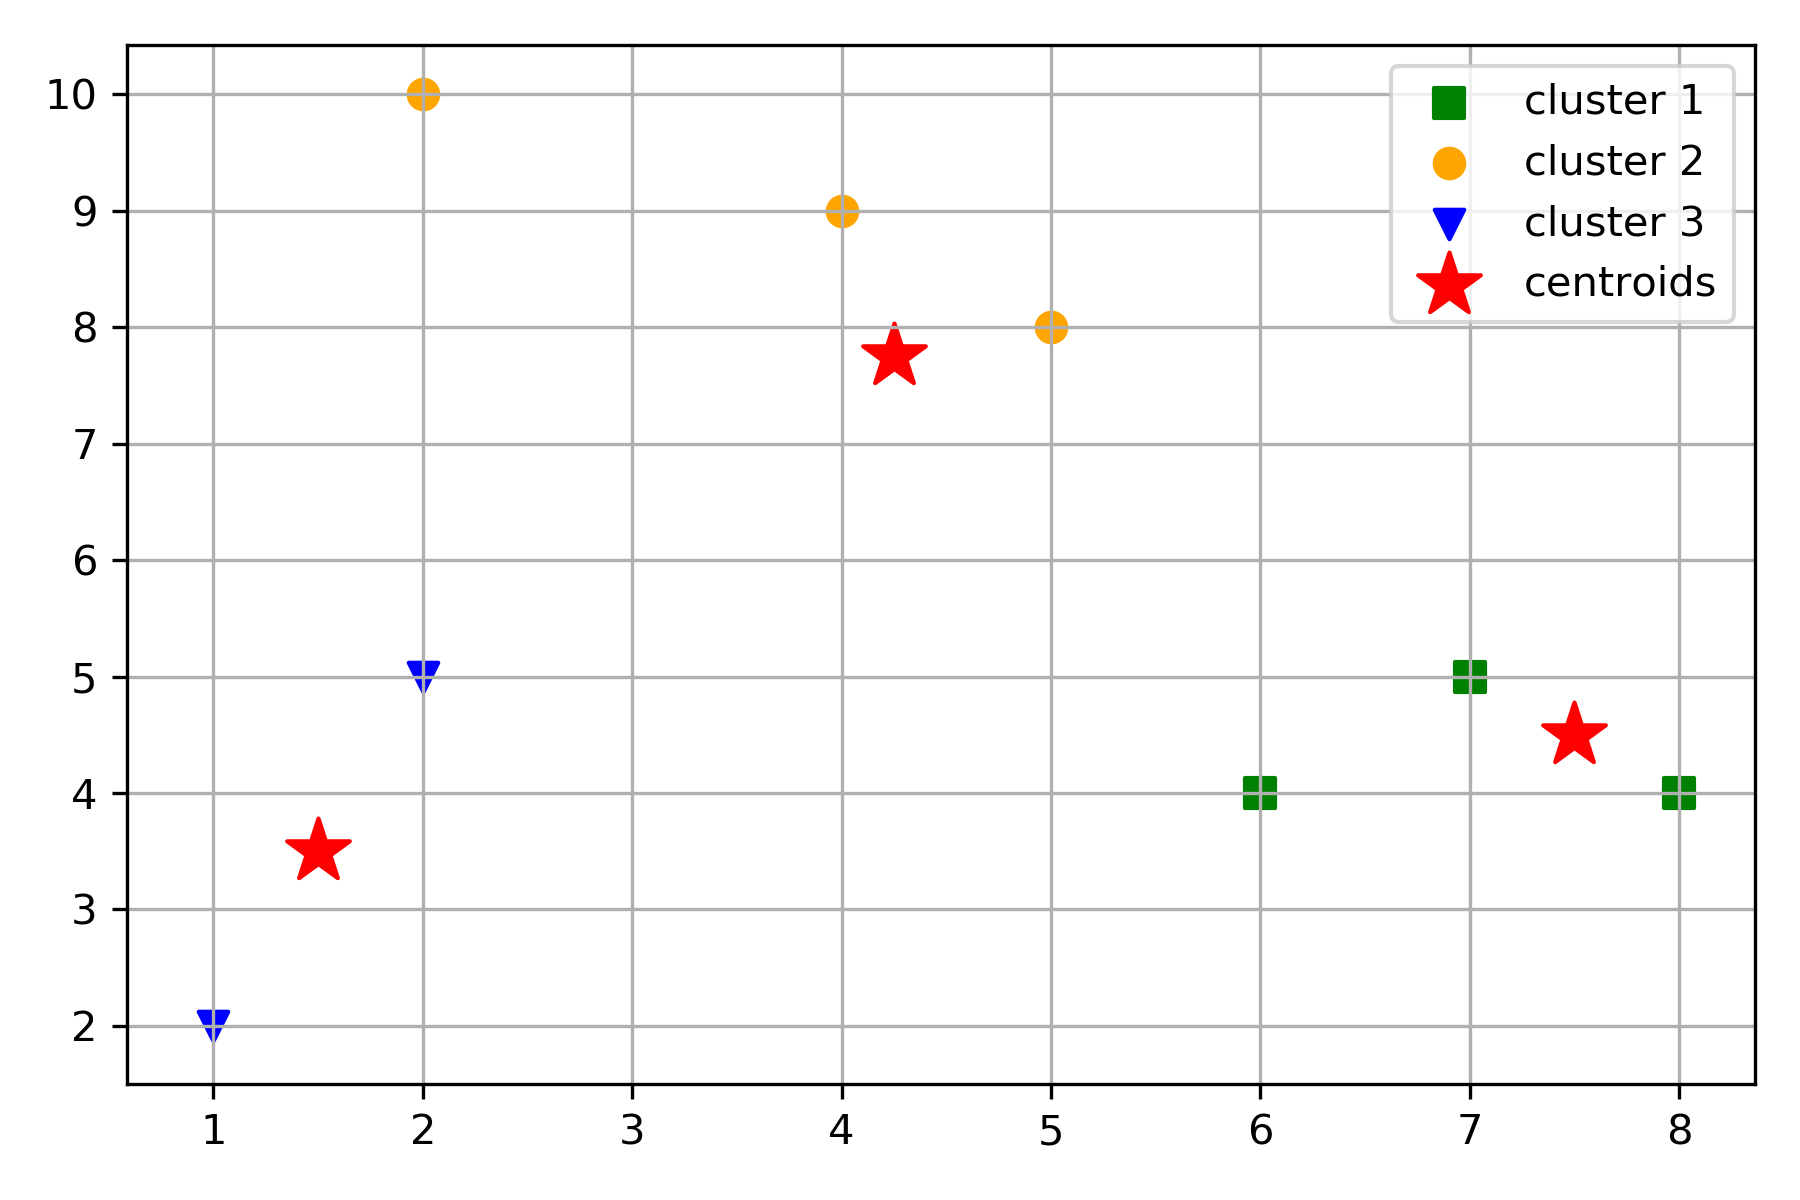

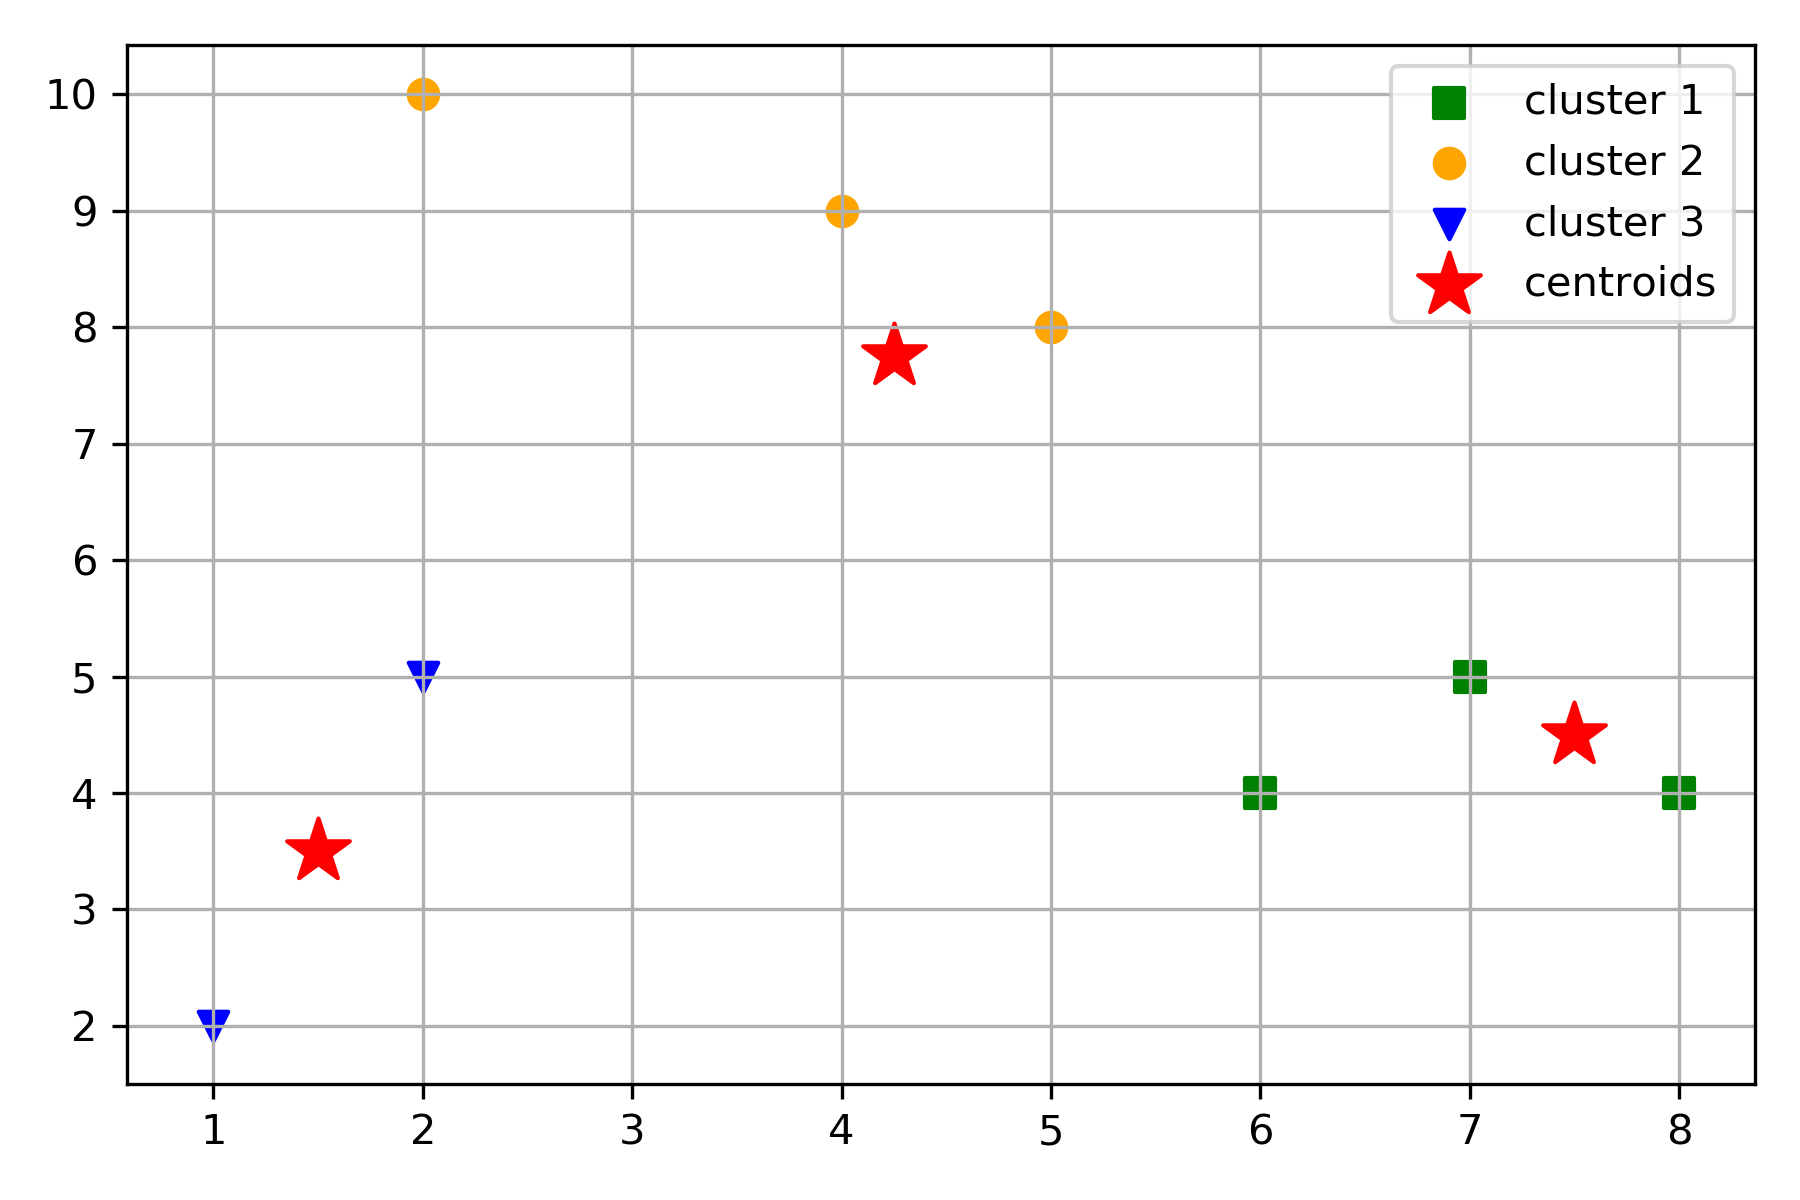

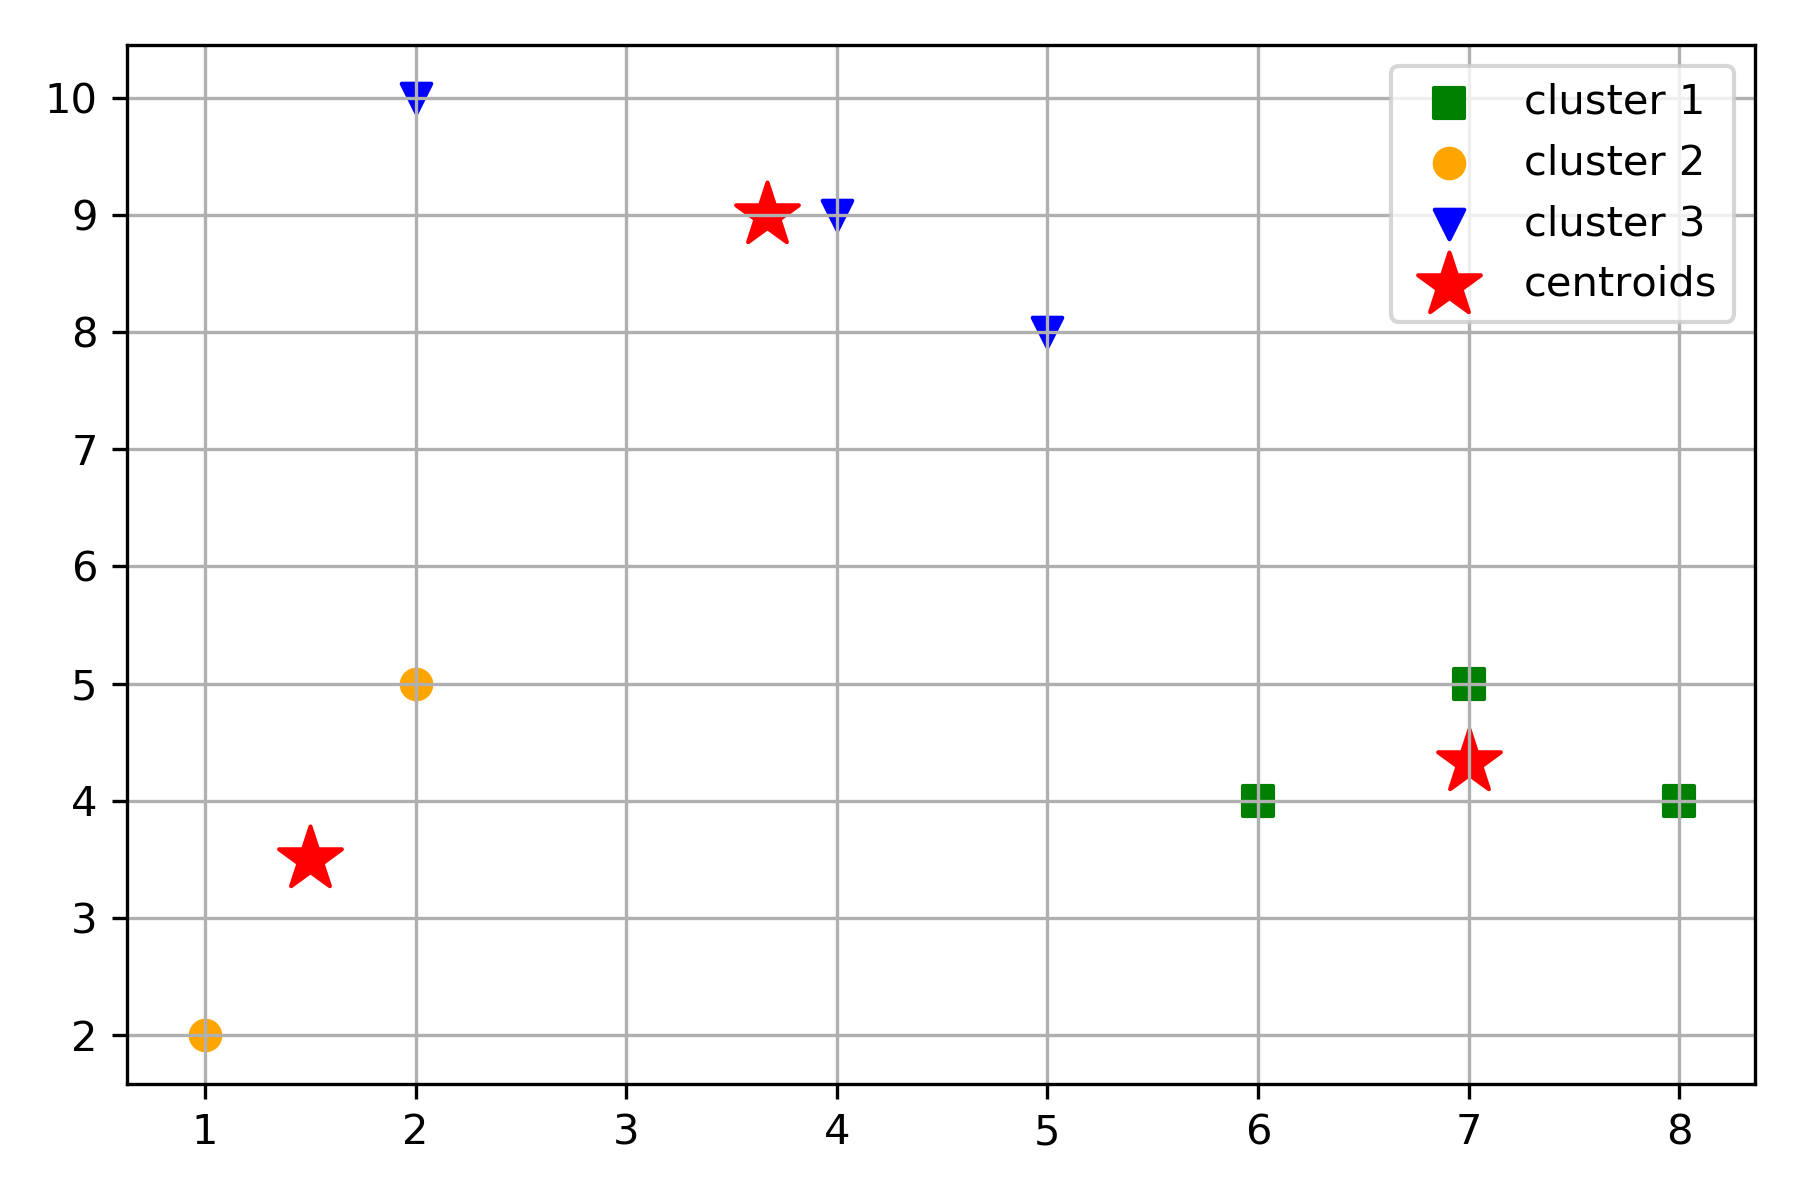

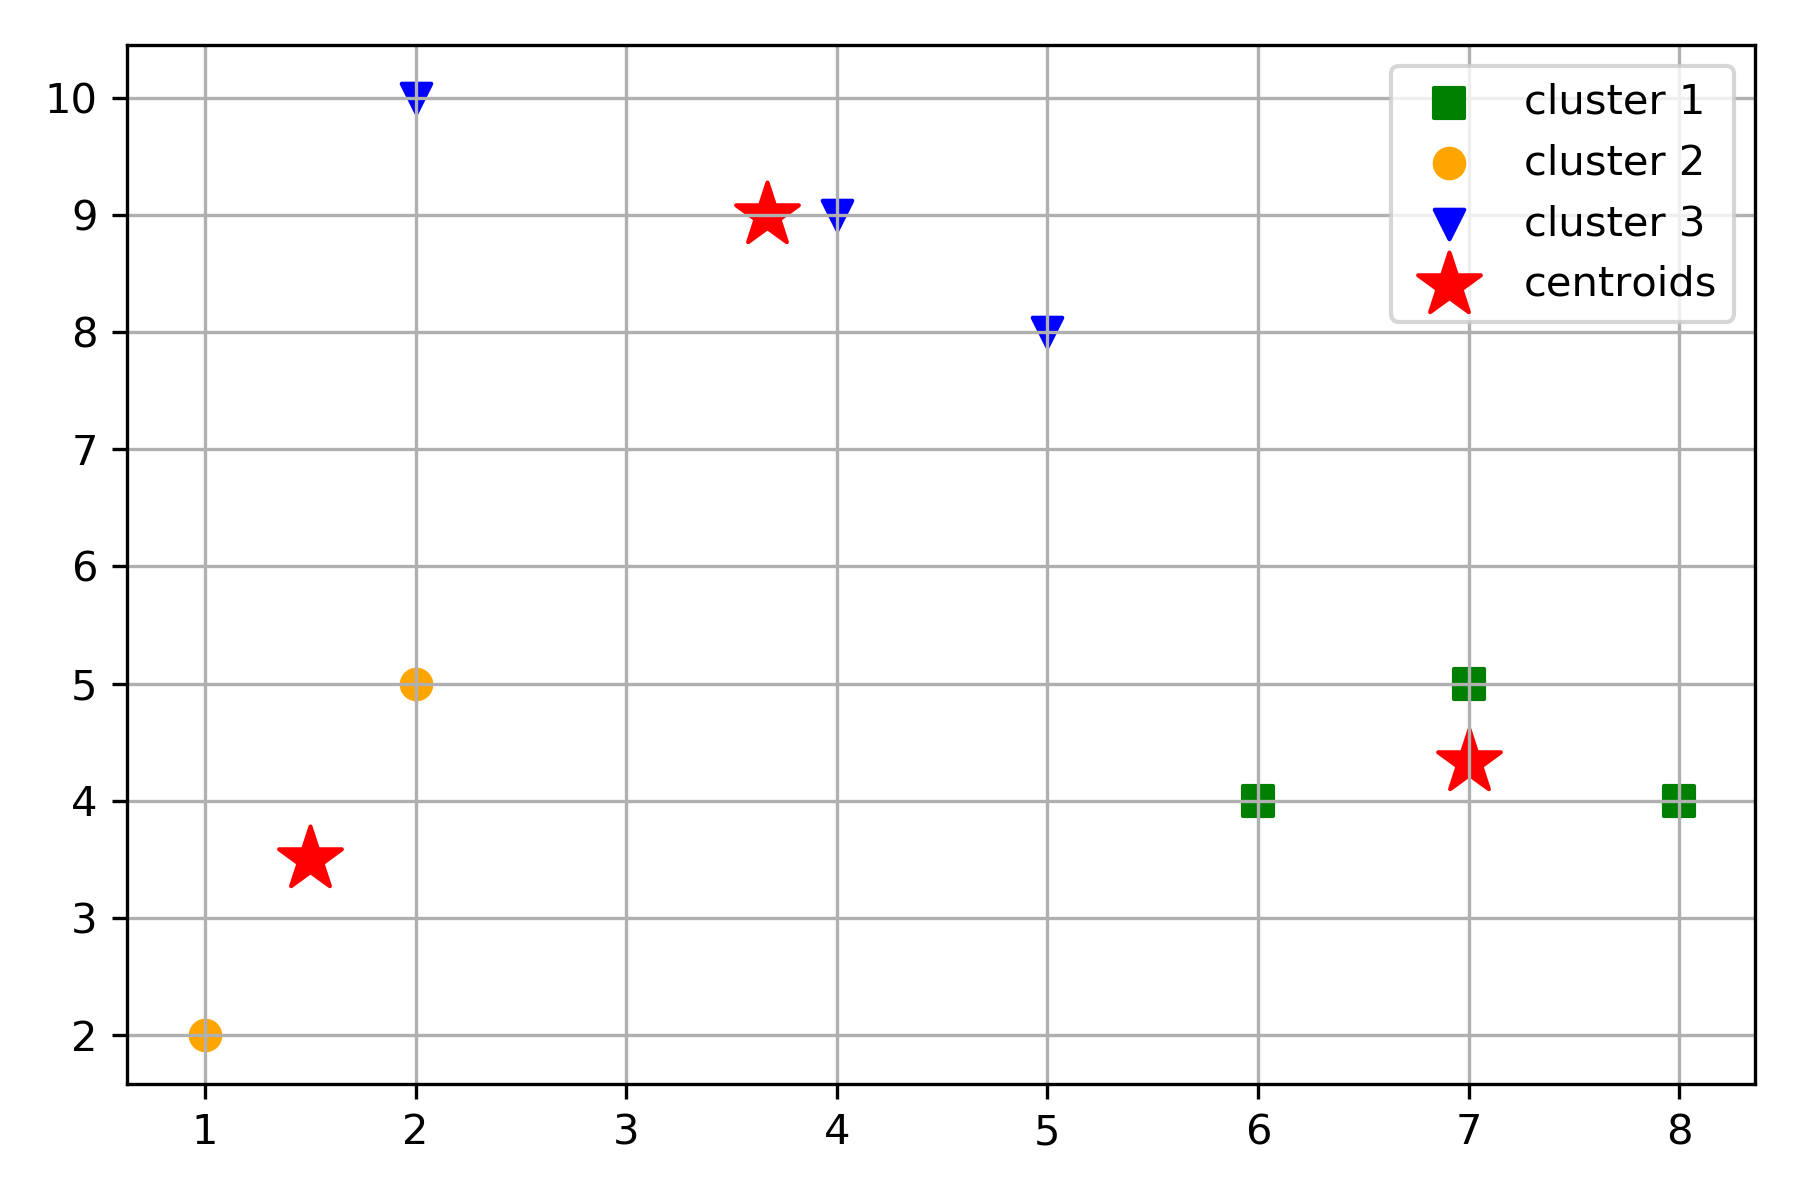

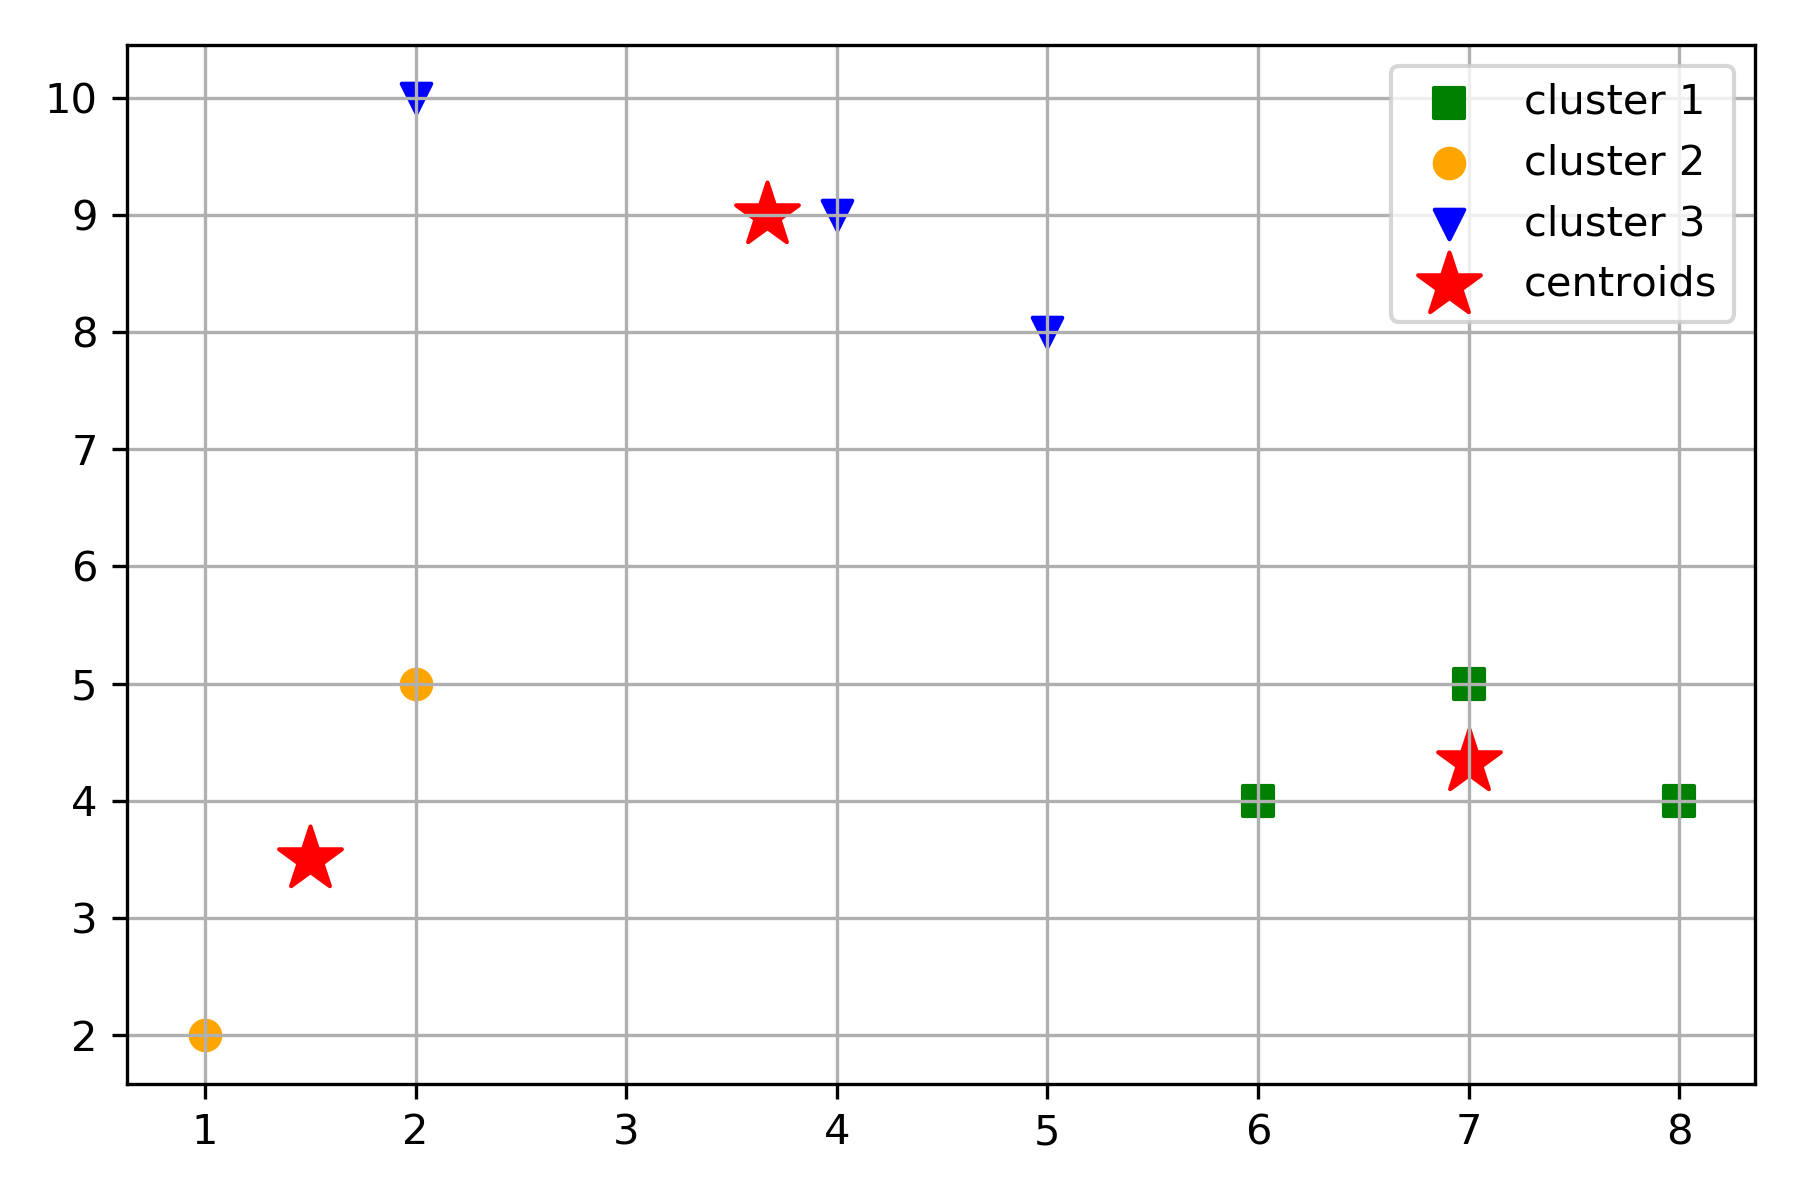

In [68]:
from IPython.display import Image
l = []
for i in range(1,11):
    l.append(Image(filename='./figures/centroids'+str(i)+'.png', width=500))
display(*l)

The best clustering estimation will be kept. Iteration 1 to 3 are the same as well as iteration 4 to 7 and iteration 8 to 10. Iteration 2 and 3 are not better than 1, the 4th is better than the 1st and the 8th iteration is better than the 4th. The 8th iteration delivers the best result.

### 4. Calculate and display the (square form of) the distance matrix using the squared euclidean metric

In [69]:
row_pdist = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(row_pdist), columns=itemlabels, index=itemlabels)
row_dist

,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8
D_1,0.000000,5.000000,8.485281,3.605551,7.071068,7.211103,8.062258,2.236068
D_2,5.000000,0.000000,6.082763,4.242641,5.000000,4.123106,3.162278,4.472136
D_3,8.485281,6.082763,0.000000,5.000000,1.414214,2.000000,7.280110,6.403124
D_4,3.605551,4.242641,5.000000,0.000000,3.605551,4.123106,7.211103,1.414214
D_5,7.071068,5.000000,1.414214,3.605551,0.000000,1.414214,6.708204,5.000000
D_6,7.211103,4.123106,2.000000,4.123106,1.414214,0.000000,5.385165,5.385165
D_7,8.062258,3.162278,7.280110,7.211103,6.708204,5.385165,0.000000,7.615773
D_8,2.236068,4.472136,6.403124,1.414214,5.000000,5.385165,7.615773,0.000000


### 5. Compute the linkage matrix for the sample data using the *complete, single, average* or *centroid* method. Are there any differences?

In [83]:
# complete linkage

row_clusters_com = linkage(pdist(df, metric='euclidean'), method='complete')
df_complete = pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
df_complete

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,3.0,7.0,1.414214,2.0
cluster 2,2.0,4.0,1.414214,2.0
cluster 3,5.0,9.0,2.000000,3.0
cluster 4,1.0,6.0,3.162278,2.0
cluster 5,0.0,8.0,3.605551,3.0
cluster 6,10.0,11.0,7.280110,5.0
cluster 7,12.0,13.0,8.485281,8.0


In [77]:
# single linkage

row_clusters_sin = linkage(pdist(df, metric='euclidean'), method='single')
df_single = pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
df_single

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,3.0,7.0,1.414214,2.0
cluster 2,2.0,4.0,1.414214,2.0
cluster 3,5.0,9.0,2.000000,3.0
cluster 4,1.0,6.0,3.162278,2.0
cluster 5,0.0,8.0,3.605551,3.0
cluster 6,10.0,11.0,7.280110,5.0
cluster 7,12.0,13.0,8.485281,8.0


In [78]:
# average linkage

row_clusters_ave = linkage(pdist(df, metric='euclidean'), method='average')
df_average = pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
df_average

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,3.0,7.0,1.414214,2.0
cluster 2,2.0,4.0,1.414214,2.0
cluster 3,5.0,9.0,2.000000,3.0
cluster 4,1.0,6.0,3.162278,2.0
cluster 5,0.0,8.0,3.605551,3.0
cluster 6,10.0,11.0,7.280110,5.0
cluster 7,12.0,13.0,8.485281,8.0


In [85]:
# centroid linkage

row_clusters_cen = linkage(pdist(df, metric='euclidean'), method='centroid')
df_centroid = pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
df_centroid

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,3.0,7.0,1.414214,2.0
cluster 2,2.0,4.0,1.414214,2.0
cluster 3,5.0,9.0,2.000000,3.0
cluster 4,1.0,6.0,3.162278,2.0
cluster 5,0.0,8.0,3.605551,3.0
cluster 6,10.0,11.0,7.280110,5.0
cluster 7,12.0,13.0,8.485281,8.0


There is no difference. Maybe because there are not enough data points?

### 6. Plot all four resulting dendrograms as subplots of a single figure

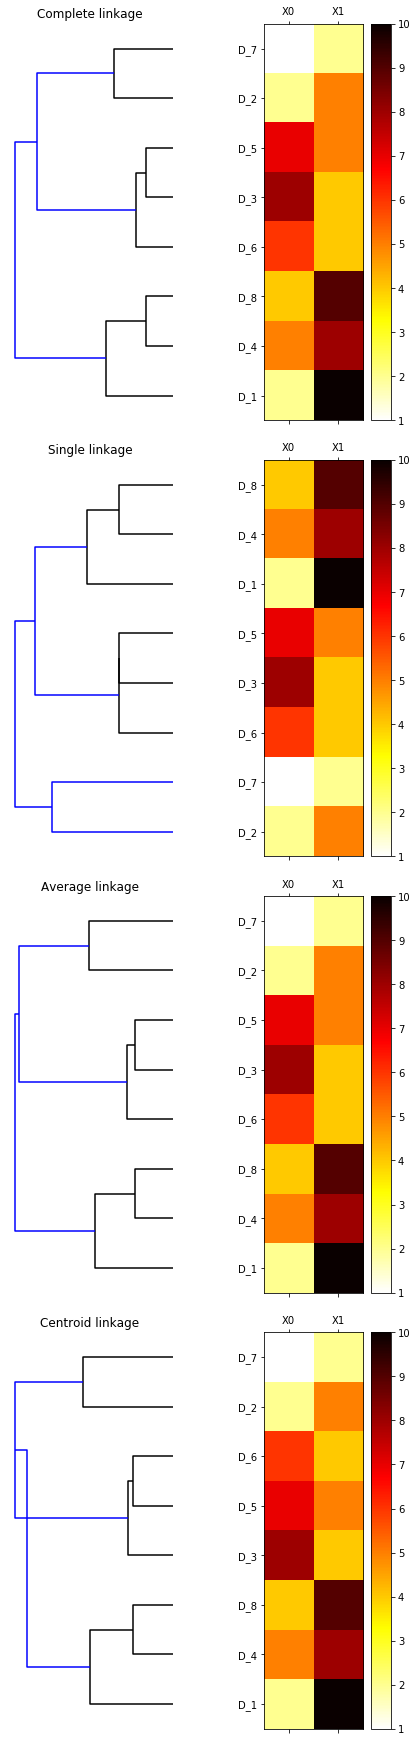

In [86]:
lis = [row_clusters_com, row_clusters_sin, row_clusters_ave, row_clusters_cen]
leg = ['Complete linkage', 'Single linkage', 'Average linkage', 'Centroid linkage']
pos = 420

# plot with various axes scales
plt.figure()

for i in range(4):
    
    pos = pos + 1
    axd = plt.subplot(pos)
    
    # plot row dendrogram
    row_dendr = dendrogram(lis[i], orientation='left')
    df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
    axd.set_xticks([])
    axd.set_yticks([])
    for j in axd.spines.values():
        j.set_visible(False)    
    plt.title(leg[i])
    
    pos = pos + 1
    axm = plt.subplot(pos)

    # plot heatmap
    cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
    plt.colorbar(cax)
    axm.set_xticklabels([''] + list(df_rowclust.columns))
    axm.set_yticklabels([''] + list(df_rowclust.index))


plt.subplots_adjust(top=0.92, bottom=-5, left=0.10, right=1, hspace=0.1,
                    wspace=0.35)

plt.show()